In [22]:
%matplotlib inline
import pandas as pd
from amb_sdk.sdk import DarwinSdk
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report
import datetime


In [23]:
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')

(True, 'https://amb-demo-api.sparkcognition.com/v1/')

In [24]:
#Setting environmental variables 
USERNAME='idunlap@rocketmail.com'
PASSWORD='5uVGHsTHrQ'

#Setting path to datasets
#Here we are using the 17/18 data to train season to train and the 16/17 season data to test
#Since we're looking for predicted position, we use datasets with single-position players (SPP)
PATH_TO_DATASET='sets/'
TRAIN_DATASET='17_18_Season_Stats_Per_100_Possessions_SPP.csv'
TEST_DATASET= '16_17_Season_Stats_Per_100_Possessions_SPP.csv'

#creating a datetime timestamp for later use
TS = '{:%Y%m%d%H%M%S}'.format(datetime.datetime.now())

In [25]:
#Log in 
status, msg = ds.auth_login_user(USERNAME,PASSWORD)
if not status:
    print(msg)
    
#Pre-build cleanup
ds.delete_all_datasets()
ds.delete_all_models()
ds.delete_all_artifacts()

Deleting 17_18_Season_Stats_Per_100_Possessions_SPP.csv
Deleting model-20190423154416
Deleting Pos_model020190423154254
Deleting model-20190423154100
Deleting Pos_model020190423154023
Deleting model-20190423152438
Deleting model-20190423150454
Deleting b58e8a85f7384aab8846dbf4498f78d9
Error removing artifact "b58e8a85f7384aab8846dbf4498f78d9" - 404: NOT FOUND - {"message": "Failed to find artifact b58e8a85f7384aab8846dbf4498f78d9"}

Deleting 44d13b7470664d8d9635083fbcf5938d
Error removing artifact "44d13b7470664d8d9635083fbcf5938d" - 404: NOT FOUND - {"message": "Failed to find artifact 44d13b7470664d8d9635083fbcf5938d"}

Deleting 2675cf18b2934b3d8457c3c6bc922d54
Error removing artifact "2675cf18b2934b3d8457c3c6bc922d54" - 404: NOT FOUND - {"message": "Failed to find artifact 2675cf18b2934b3d8457c3c6bc922d54"}

Deleting 101dd4ea79be471e9e8e6b933a20b3e6
Error removing artifact "101dd4ea79be471e9e8e6b933a20b3e6" - 404: NOT FOUND - {"message": "Failed to find artifact 101dd4ea79be471e9e8e

(True, None)

In [26]:
# Preview dataset and display the first 5 entries
df = pd.read_csv(os.path.join(PATH_TO_DATASET, TRAIN_DATASET))
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,string_field_29,ORtg,DRtg
0,8,Jarrett Allen\allenja01,C,19,BRK,72,31,1441,7.9,13.4,...,13.1,1.7,0.9,3.0,2.8,5.0,19.8,NaN,119.0,108
1,15,Ike Anigbogu\anigbik01,C,19,IND,11,0,30,6.7,15.0,...,15.0,0.0,1.7,5.0,3.3,1.7,21.7,NaN,114.0,104
2,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,6.4,12.5,...,14.0,3.7,1.2,1.5,2.4,5.1,17.5,NaN,116.0,105
3,62,Tony Bradley\bradlto01,C,20,UTA,9,0,29,5.2,19.0,...,19.0,1.7,0.0,0.0,0.0,1.7,13.8,NaN,95.0,107
4,75,Thomas Bryant\bryanth01,C,20,LAL,15,0,72,5.3,14.0,...,11.3,4.0,0.7,1.3,1.3,4.0,14.6,NaN,100.0,108


In [27]:
# Upload dataset to darwin
status, dataset = ds.upload_dataset(os.path.join(PATH_TO_DATASET, TRAIN_DATASET))
if not status:
    print(dataset)

In [28]:
# clean dataset
# Our target attribute is 'Pos' (position)
target = "Pos"
status, job_id = ds.clean_data(TRAIN_DATASET, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-23T16:04:13.594712', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['40f6129f2c404b88846fc8490de18603'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-23T16:04:13.594712', 'endtime': '2019-04-23T16:04:17.277534', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['40f6129f2c404b88846fc8490de18603'], 'model_name': None, 'job_error': ''}


In [29]:
# Build our model with the train dataset
# append the timestamp created earlier to the name so that it's unique
model = target + "_model0" + TS
status, job_id = ds.create_model(dataset_names = TRAIN_DATASET, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-23T16:05:05.922253', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': None, 'model_name': 'Pos_model020190423160230', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-23T16:05:05.922253', 'endtime': None, 'percent_complete': 4, 'job_type': 'TrainModel', 'loss': 1.310286521911621, 'generations': 5, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': None, 'model_name': 'Pos_model020190423160230', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-23T16:05:05.922253', 'endtime': None, 'percent_complete': 4, 'job_type': 'TrainModel', 'loss': 1.310286521911621, 'generations': 5, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': None, 'model_name': 'Pos_model020190423160230', 'job_error': ''}
{'status': 'Running', 'st

In [31]:
# Get feature importance
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

#Display feature importance for top 15 features
feature_importance[:15]

{'status': 'Running', 'starttime': '2019-04-23T16:07:39.134978', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 1.310286521911621, 'generations': 5, 'dataset_names': None, 'artifact_names': ['f06895d56b32478fab5b58c9a225098b'], 'model_name': 'Pos_model020190423160230', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-23T16:07:39.134978', 'endtime': '2019-04-23T16:07:40.818298', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 1.310286521911621, 'generations': 5, 'dataset_names': None, 'artifact_names': ['f06895d56b32478fab5b58c9a225098b'], 'model_name': 'Pos_model020190423160230', 'job_error': ''}


TRB     0.104012
AST     0.086463
ORB     0.078599
FG_     0.056621
_3PA    0.037785
DRB     0.037355
BLK     0.036466
TOV     0.033070
FGA     0.030886
_3P     0.030566
STL     0.030057
Rk      0.028918
PF      0.028702
FG      0.027704
G       0.026583
dtype: float64

In [32]:
#Model prediction
status, artifact = ds.run_model(TRAIN_DATASET, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

#Display prediction
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

{'status': 'Running', 'starttime': '2019-04-23T16:08:39.119137', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 1.310286521911621, 'generations': 5, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['d78b7fa78b8e409fa5562eafa41c3b9f'], 'model_name': 'Pos_model020190423160230', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-23T16:08:39.119137', 'endtime': '2019-04-23T16:08:47.584617', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 1.310286521911621, 'generations': 5, 'dataset_names': ['17_18_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['d78b7fa78b8e409fa5562eafa41c3b9f'], 'model_name': 'Pos_model020190423160230', 'job_error': ''}


,Pos,prob_C,prob_PF,prob_PG,prob_SF,prob_SG
0,C,0.899854,0.089511,0.002823,0.005247,0.002565
1,C,0.756620,0.182185,0.017500,0.021227,0.022468
2,C,0.960751,0.028113,0.003689,0.005400,0.002047
3,C,0.625657,0.219436,0.031908,0.066549,0.056451
4,C,0.741970,0.111720,0.022423,0.112100,0.011787


              precision    recall  f1-score   support

           C       0.92      0.97      0.94       126
          PF       0.95      0.88      0.91       123
          PG       0.93      0.94      0.94       142
          SF       0.91      0.90      0.91       114
          SG       0.91      0.92      0.91       156

   micro avg       0.92      0.92      0.92       661
   macro avg       0.92      0.92      0.92       661
weighted avg       0.92      0.92      0.92       661



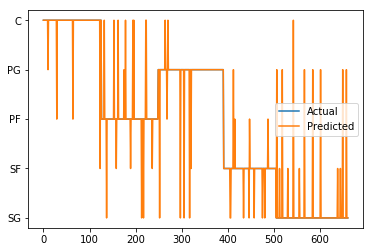

In [36]:
#Plot predictions vs actual player positions
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

In [37]:
#Upload test dataset 
status, dataset = ds.upload_dataset(os.path.join(PATH_TO_DATASET, TEST_DATASET))
if not status:
    print(dataset)

400: BAD REQUEST - {"message": "Dataset already exists"}



In [38]:
# clean test dataset
status, job_id = ds.clean_data(TEST_DATASET, target = target, model_name = model)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-23T16:10:39.388365', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['16_17_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['abb89d08e95c471fa6f3a2d61fb6a95e'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-23T16:10:39.388365', 'endtime': '2019-04-23T16:10:41.607723', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['16_17_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['abb89d08e95c471fa6f3a2d61fb6a95e'], 'model_name': None, 'job_error': ''}


In [39]:
#Run our model on test dataset
status, artifact = ds.run_model(TEST_DATASET, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Complete', 'starttime': '2019-04-23T16:11:43.559388', 'endtime': '2019-04-23T16:11:44.617962', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 1.310286521911621, 'generations': 5, 'dataset_names': ['16_17_Season_Stats_Per_100_Possessions_SPP.csv'], 'artifact_names': ['26c0f79eea2749268e984c0c23e34bed'], 'model_name': 'Pos_model020190423160230', 'job_error': ''}


(True, 'Job completed')

              precision    recall  f1-score   support

           C       0.74      0.82      0.78       114
          PF       0.55      0.50      0.52       129
          PG       0.78      0.85      0.81       117
          SF       0.45      0.34      0.38       110
          SG       0.58      0.65      0.61       124

   micro avg       0.63      0.63      0.63       594
   macro avg       0.62      0.63      0.62       594
weighted avg       0.62      0.63      0.62       594



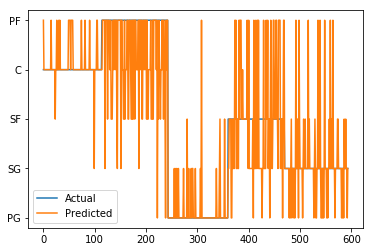

In [40]:
# Plot prediction vs actual player positions
status, prediction = ds.download_artifact(artifact['artifact_name'])
df = pd.read_csv(os.path.join(PATH_TO_DATASET, TEST_DATASET))
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

In [41]:
#Retrieve the modle that Darwin used
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'XGBClassifier', 'parameters': {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.16054644918525737, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 247, 'n_jobs': -1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.805382220656603}}
